below is some code to load the array/SAT dataset and visualize an example multi-image QA example
```python
from datasets import load_dataset
import io

dataset = load_dataset("array/SAT", batch_size=128)

# dataset should have a training and validation key

example = dataset['validation'][10] # example 10th item
print(example)
# >
# {'image_bytes': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
#   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>],
#  'question': 'The first image is from the beginning of the video and the second image is from the end. How did the camera likely move when shooting the video?',
#  'answers': ['rotated right', 'rotated left'],
#  'question_type': 'action_sequence',
#  'correct_answer': 'rotated right'}

images = example['image_bytes']
question = example['question']
answer_choices = example['answers']
correct_answer = example['correct_answer']

# visualize all images and the question
import matplotlib.pyplot as plt

n_images = len(images)
fig, axs = plt.subplots(1, n_images, figsize=(5 * n_images, 5))
for i, (im, ax) in enumerate(zip(images, axs)):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(f"Image {i + 1}")
plt.show()

print(f"Question: {question}")
print(f"Answer choices: {answer_choices}")
print(f"Correct answer: {correct_answer}")
```

---


ok, what I want to do is to write a python script that will iterate through the dataset and save it down in a "llava" format for my training code. below are some examples of the json structure that is needed. note that this is multi-image data not video, so we need to use the image tag not the video tag. I'd like it saved as a jsonl file, with each line being a json object. we also need to save the images down to disk. I'd like to organize them in a folder under `/data/weka/ellisb/datasets`. use the split, the sample id, and image idx to delineate the image file name, group them into a structure like this:
```
/data/weka/ellisb/datasets/SAT/{split}/{sample_id}_{image_idx}.jpg
```


example generated video jsonl format:
```
{"id": "spoc_jan17_v2__0", "conversations": [{"from": "human", "value": "What is the length of the shortest dimension (length, width, or height) of the window (in centimeters)?\nIf there were multiple instances of the object, use the first one you saw.", "task": "obj_short_size_est"}, {"from": "gpt", "value": "9"}], "type": "oe", "data_source": "spoc_jan17_v2", "video": "/data/weka/ellisb/vida/experiment_output/dataset/jan17_v2/val/000053/raw_navigation_camera__1.mp4"}
{"id": "spoc_jan17_v2__1", "conversations": [{"from": "human", "value": "What is the length of the shortest dimension (length, width, or height) of the arm chair (in centimeters)?\nIf there were multiple instances of the object, use the first one you saw.", "task": "obj_short_size_est"}, {"from": "gpt", "value": "73"}], "type": "oe", "data_source": "spoc_jan17_v2", "video": "/data/weka/ellisb/vida/experiment_output/dataset/jan17_v2/val/000053/raw_navigation_camera__1.mp4"}
```

sample multi-image json format:
```
[{'sample_id': 5390,
  'conversations': [{'from': 'human',
    'value': "<image><image>\nWhat's the detailed difference between the 2 images? Please list in detail."},
   {'from': 'gpt',
    'value': 'The differences between the two images are:\n\n1. In the second image, there are leaves falling from the sunflowers and the surrounding foliage.\n2. The ground in the second image is covered with a layer of fallen leaves, adding a carpet-like appearance.'}],
  'image': ['HQ-Edit/images/83425.jpg', 'HQ-Edit/images/83426.jpg'],
  'choice_list': None,
  'metadata': {'dataset': 'HQ-Edit-Diff',
   'split': 'train',
   'num_sample': 98675,
   'task_instruction': "What's the difference between 2 images?",
   'question_type': 'open-ended'}},
 {'sample_id': 3434,
  'conversations': [{'from': 'human',
    'value': "<image><image>\nWhat's the detailed difference between the 2 images? Please list in detail."},
   {'from': 'gpt',
    'value': '1. The first image shows a snowy and wintery scene, while the second image depicts a lush and green environment, indicating a different season.\n2. In the first image, the trees are covered with snow, and many of the trees are leafless. In the second image, the trees are green with leaves, and there is no snow.\n3. The ground in the first image is covered with snow, whereas in the second image, the ground is visible with a dirt path and grassy areas.\n4. The first image has a cooler, blue-toned color palette, while the second image has a warmer, green and yellow-toned color palette.\n5. There are bare branches and bushes in the first image, while in the second image, these are replaced with colorful flowers and lush greenery.\n6. The light in the first image appears cooler and less intense, while in the second image, sunlight is streaming through the trees with visible sunbeams.\n7. The sky in the first image has partly cloudy weather with more of a winter atmosphere, while the sky in the second image appears clearer with a bright sun shining.'}],
  'image': ['HQ-Edit/images/3662.jpg', 'HQ-Edit/images/3661.jpg'],
  'choice_list': None,
  'metadata': {'dataset': 'HQ-Edit-Diff',
   'split': 'train',
   'num_sample': 98675,
   'task_instruction': "What's the difference between 2 images?",
   'question_type': 'open-ended'}}]
```


In [9]:
from datasets import load_dataset
import io

dataset = load_dataset("array/SAT", batch_size=128)

# dataset should have a training and validation key

example = dataset['validation'][10] # example 10th item

In [87]:
train = dataset['train']

In [91]:
d

{'image_bytes': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>],
 'question': 'How many Chairs are visible in the scene?',
 'answers': ['3', '0', '6', '4', '5'],
 'question_type': 'other',
 'correct_answer': '3'}

(array([8796.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0., 1204.]),
 array([1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 ,
        1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42,
        1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64,
        1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86,
        1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  ]),
 <BarContainer object of 50 artists>)

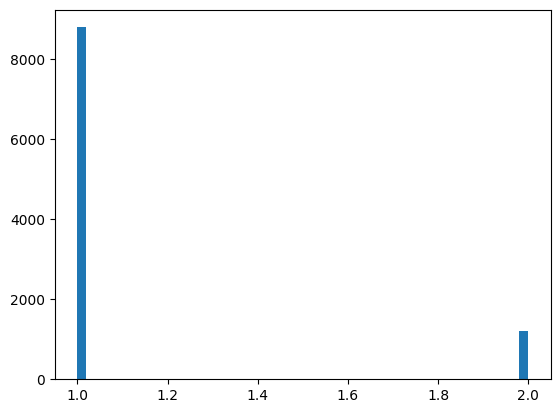

In [98]:
n_img = []
# for d in train:

# randomly sample 1000 images
# shuffle train hf dataset
import random
idxs = random.sample(range(len(train)), 10_000)
for i in idxs:
    d = train[i]

    img = d['image_bytes']
    n_img.append(len(img))

# plot histogram of image sizes
import matplotlib.pyplot as plt
plt.hist(n_img, bins=50)

(array([219., 206., 189., 180., 213., 206., 206., 174., 207., 198., 209.,
        202., 196., 199., 198., 208., 196., 188., 194., 198., 203., 186.,
        180., 207., 208., 212., 211., 220., 181., 193., 194., 194., 205.,
        192., 222., 204., 195., 228., 184., 186., 194., 220., 181., 212.,
        201., 194., 196., 186., 215., 210.]),
 array([1.000000e+00, 3.448500e+03, 6.896000e+03, 1.034350e+04,
        1.379100e+04, 1.723850e+04, 2.068600e+04, 2.413350e+04,
        2.758100e+04, 3.102850e+04, 3.447600e+04, 3.792350e+04,
        4.137100e+04, 4.481850e+04, 4.826600e+04, 5.171350e+04,
        5.516100e+04, 5.860850e+04, 6.205600e+04, 6.550350e+04,
        6.895100e+04, 7.239850e+04, 7.584600e+04, 7.929350e+04,
        8.274100e+04, 8.618850e+04, 8.963600e+04, 9.308350e+04,
        9.653100e+04, 9.997850e+04, 1.034260e+05, 1.068735e+05,
        1.103210e+05, 1.137685e+05, 1.172160e+05, 1.206635e+05,
        1.241110e+05, 1.275585e+05, 1.310060e+05, 1.344535e+05,
        1.379010e+

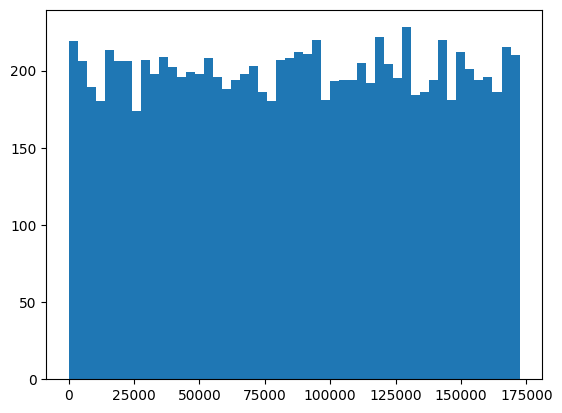

In [99]:
# plot the indices chosen
plt.figure()
plt.hist(idxs, bins=50)

In [17]:
dataset.keys()

dict_keys(['train', 'validation'])

In [ ]:
print(example)

{'image_bytes': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>],
 'question': 'The first image is from the beginning of the video and the second image is from the end. How did the camera likely move when shooting the video?',
 'answers': ['rotated right', 'rotated left'],
 'question_type': 'action_sequence',
 'correct_answer': 'rotated right'}

In [ ]:
from PIL import Image
import io

# {'image_bytes': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>,
#   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512>],
#  'question': 'The first image is from the beginning of the video and the second image is from the end. How did the camera likely move when shooting the video?',
#  'answers': ['rotated right', 'rotated left'],
#  'question_type': 'action_sequence',
#  'correct_answer': 'rotated right'}


images = []
for img in example['image_bytes']:
    # if the image is given as raw bytes, load it using PIL; otherwise, assume it's already a PIL Image
    if isinstance(img, bytes):
        images.append(Image.open(io.BytesIO(img)))
        print(f"Loaded image of size {images[-1].size}")
    else:
        images.append(img)
        print(f"Image already loaded, size {images[-1].size}")


Image already loaded, size (512, 512)
Image already loaded, size (512, 512)


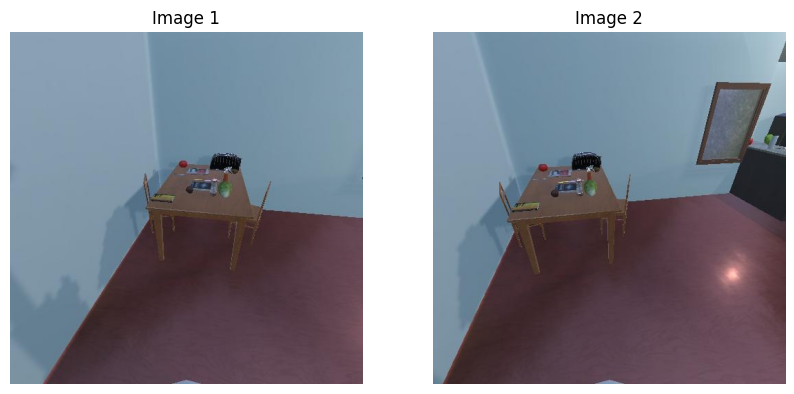

Question: The first image is from the beginning of the video and the second image is from the end. How did the camera likely move when shooting the video?
Answer choices: ['rotated right', 'rotated left']
Correct answer: rotated right


In [8]:
# from PIL import Image

# images = [Image.open(im_bytes) for im_bytes in example['image_bytes']] # this is a list of images. Some questions are on one image, and some on 2 images
images = example['image_bytes']
question = example['question']
answer_choices = example['answers']
correct_answer = example['correct_answer']

# visualize all images and the question
import matplotlib.pyplot as plt

n_images = len(images)
fig, axs = plt.subplots(1, n_images, figsize=(5 * n_images, 5))
for i, (im, ax) in enumerate(zip(images, axs)):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(f"Image {i + 1}")
plt.show()

print(f"Question: {question}")
print(f"Answer choices: {answer_choices}")
print(f"Correct answer: {correct_answer}")


In [10]:
file = "/data/weka/ellisb/datasets/video/m4_instruct/m4_instruct_annotations.json"
import json
with open(file, "r") as f:
    data = json.load(f)

print(data.keys())

AttributeError: 'list' object has no attribute 'keys'

In [12]:
len(data)

615814

In [15]:
data[:2]

[{'sample_id': 5390,
  'conversations': [{'from': 'human',
    'value': "<image><image>\nWhat's the detailed difference between the 2 images? Please list in detail."},
   {'from': 'gpt',
    'value': 'The differences between the two images are:\n\n1. In the second image, there are leaves falling from the sunflowers and the surrounding foliage.\n2. The ground in the second image is covered with a layer of fallen leaves, adding a carpet-like appearance.'}],
  'image': ['HQ-Edit/images/83425.jpg', 'HQ-Edit/images/83426.jpg'],
  'choice_list': None,
  'metadata': {'dataset': 'HQ-Edit-Diff',
   'split': 'train',
   'num_sample': 98675,
   'task_instruction': "What's the difference between 2 images?",
   'question_type': 'open-ended'}},
 {'sample_id': 3434,
  'conversations': [{'from': 'human',
    'value': "<image><image>\nWhat's the detailed difference between the 2 images? Please list in detail."},
   {'from': 'gpt',
    'value': '1. The first image shows a snowy and wintery scene, while 

In [21]:
img_tag = "<image>"
for d in data:
    v = d['conversations'][0]['value']
    n_images = v.count(img_tag)
    print(n_images, v)
    break

2 <image><image>
What's the detailed difference between the 2 images? Please list in detail.


100%|██████████| 615814/615814 [00:00<00:00, 813204.63it/s]


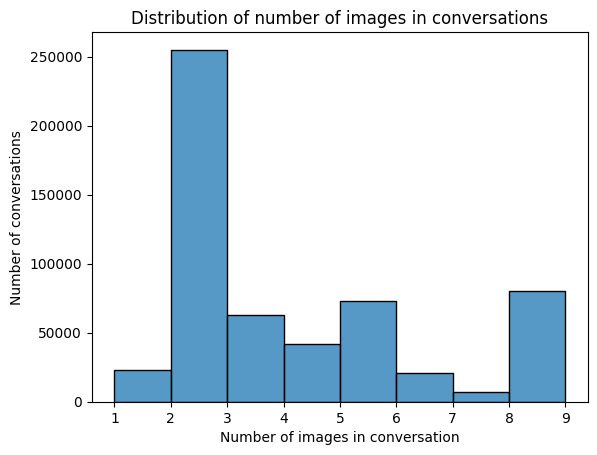

In [25]:
# keep track of the number of images in each conversation, then plot a histogram

from tqdm import tqdm

n_images = []
for d in tqdm(data):
    v = d['conversations'][0]['value']
    n_images.append(v.count(img_tag))


# plt.hist(n_images, bins=range(1, 10))
# plt.xlabel("Number of images in conversation")
# plt.ylabel("Number of conversations")
# plt.title("Distribution of number of images in conversations")
# plt.show()

# sns
import seaborn as sns
sns.histplot(n_images, bins=range(1, 10))
plt.xlabel("Number of images in conversation")
plt.ylabel("Number of conversations")
plt.title("Distribution of number of images in conversations")
plt.show()

In [63]:
import pandas as pd

df = pd.DataFrame(data)
df["n_images"] = df["conversations"].apply(lambda x: x[0]['value'].count(img_tag))
df["source"] = df["metadata"].apply(lambda x: x["dataset"] if "dataset" in x else "UNK")
df

,sample_id,conversations,image,choice_list,metadata,datasource,id,task_instruction_id,input,output,n_images,source
0,5390.0,"[{'from': 'human', 'value': '<image><image> Wh...","[HQ-Edit/images/83425.jpg, HQ-Edit/images/8342...",None,"{'dataset': 'HQ-Edit-Diff', 'split': 'train', ...",NaN,NaN,NaN,NaN,NaN,2,HQ-Edit-Diff
1,3434.0,"[{'from': 'human', 'value': '<image><image> Wh...","[HQ-Edit/images/3662.jpg, HQ-Edit/images/3661....",None,"{'dataset': 'HQ-Edit-Diff', 'split': 'train', ...",NaN,NaN,NaN,NaN,NaN,2,HQ-Edit-Diff
2,791.0,"[{'from': 'human', 'value': '<image><image> Wh...","[HQ-Edit/images/15997.jpg, HQ-Edit/images/1599...",None,"{'dataset': 'HQ-Edit-Diff', 'split': 'train', ...",NaN,NaN,NaN,NaN,NaN,2,HQ-Edit-Diff
3,7018.0,"[{'from': 'human', 'value': '<image><image> Wh...","[HQ-Edit/images/105196.jpg, HQ-Edit/images/105...",None,"{'dataset': 'HQ-Edit-Diff', 'split': 'train', ...",NaN,NaN,NaN,NaN,NaN,2,HQ-Edit-Diff
4,4752.0,"[{'from': 'human', 'value': '<image><image> Wh...","[HQ-Edit/images/191335.jpg, HQ-Edit/images/191...",None,"{'dataset': 'HQ-Edit-Diff', 'split': 'train', ...",NaN,NaN,NaN,NaN,NaN,2,HQ-Edit-Diff
...,...,...,...,...,...,...,...,...,...,...,...,...
615809,7565.0,"[{'from': 'human', 'value': 'What's the differ...","[MagicBrush/images/17404.jpg, MagicBrush/image...",None,"{'dataset': 'MagicBrush-Diff', 'split': 'train...",NaN,NaN,NaN,NaN,NaN,2,MagicBrush-Diff
615810,7566.0,"[{'from': 'human', 'value': 'What's the differ...","[MagicBrush/images/17406.jpg, MagicBrush/image...",None,"{'dataset': 'MagicBrush-Diff', 'split': 'train...",NaN,NaN,NaN,NaN,NaN,2,MagicBrush-Diff
615811,7567.0,"[{'from': 'human', 'value': 'What's the differ...","[MagicBrush/images/17408.jpg, MagicBrush/image...",None,"{'dataset': 'MagicBrush-Diff', 'split': 'train...",NaN,NaN,NaN,NaN,NaN,4,MagicBrush-Diff
615812,7568.0,"[{'from': 'human', 'value': 'What's the differ...","[MagicBrush/images/17412.jpg, MagicBrush/image...",None,"{'dataset': 'MagicBrush-Diff', 'split': 'train...",NaN,NaN,NaN,NaN,NaN,2,MagicBrush-Diff


In [64]:
df["datasource"].value_counts(), df["source"].value_counts()

(datasource
 nlvr2                  86373
 coinstruct             50000
 iconqa                 34603
 contrastive_caption    25240
 imagecode              16594
 dreamsim               15941
 twitter_post            5734
 multi_vqa               4993
 nextqa                  3870
 star                    3032
 Name: count, dtype: int64,
 source
 nlvr2                           86373
 coinstruct                      50000
 HQ-Edit                         50000
 3D-LLM_3_datasets               49890
 RAVEN                           35000
 iconqa                          34603
 VIST                            26026
 ScanQA                          25563
 contrastive_caption             25240
 ALFRED                          22565
 FlintstonesSV                   22341
 imagecode                       16594
 dreamsim                        15941
 Birds-to-Words                  14281
 MagicBrush                      14249
 PororoSV                        12299
 Spot-the-Diff              

In [28]:
df["n_images"].value_counts()

n_images
2     255054
8      78988
5      72674
3      62881
4      41840
12     35000
1      23065
6      21168
10     16594
7       7268
9       1282
Name: count, dtype: int64

In [65]:
df[df["n_images"] == 8]["source"].value_counts()

source
3D-LLM_3_datasets      44615
ScanQA                 23899
nextqa                  3870
contrastive_caption     3500
star                    3032
twitter_post              72
Name: count, dtype: int64

In [84]:
dat = df[df["source"] == "star"].iloc[0]
dat

sample_id                                                            NaN
conversations          [{'from': 'human', 'value': '<image><image><im...
image                  [star/0.0.0/c55fcb268ead378049e4743c77ca2db314...
choice_list                                                          NaN
metadata               {'dataset': 'star', 'split': 'train', 'num_sam...
datasource                                                          star
id                                                                 TJZ0P
task_instruction_id                                                  NaN
input                                                                NaN
output                                                               NaN
n_images                                                               8
source                                                              star
Name: 305067, dtype: object

In [85]:
dat["image"]

['star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_0.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_1.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_2.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_3.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_4.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_5.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_6.jpg',
 'star/0.0.0/c55fcb268ead378049e4743c77ca2db3142e12a0f7dfc42eb8267e08efa85f58/train_images/TJZ0P_7.jpg']

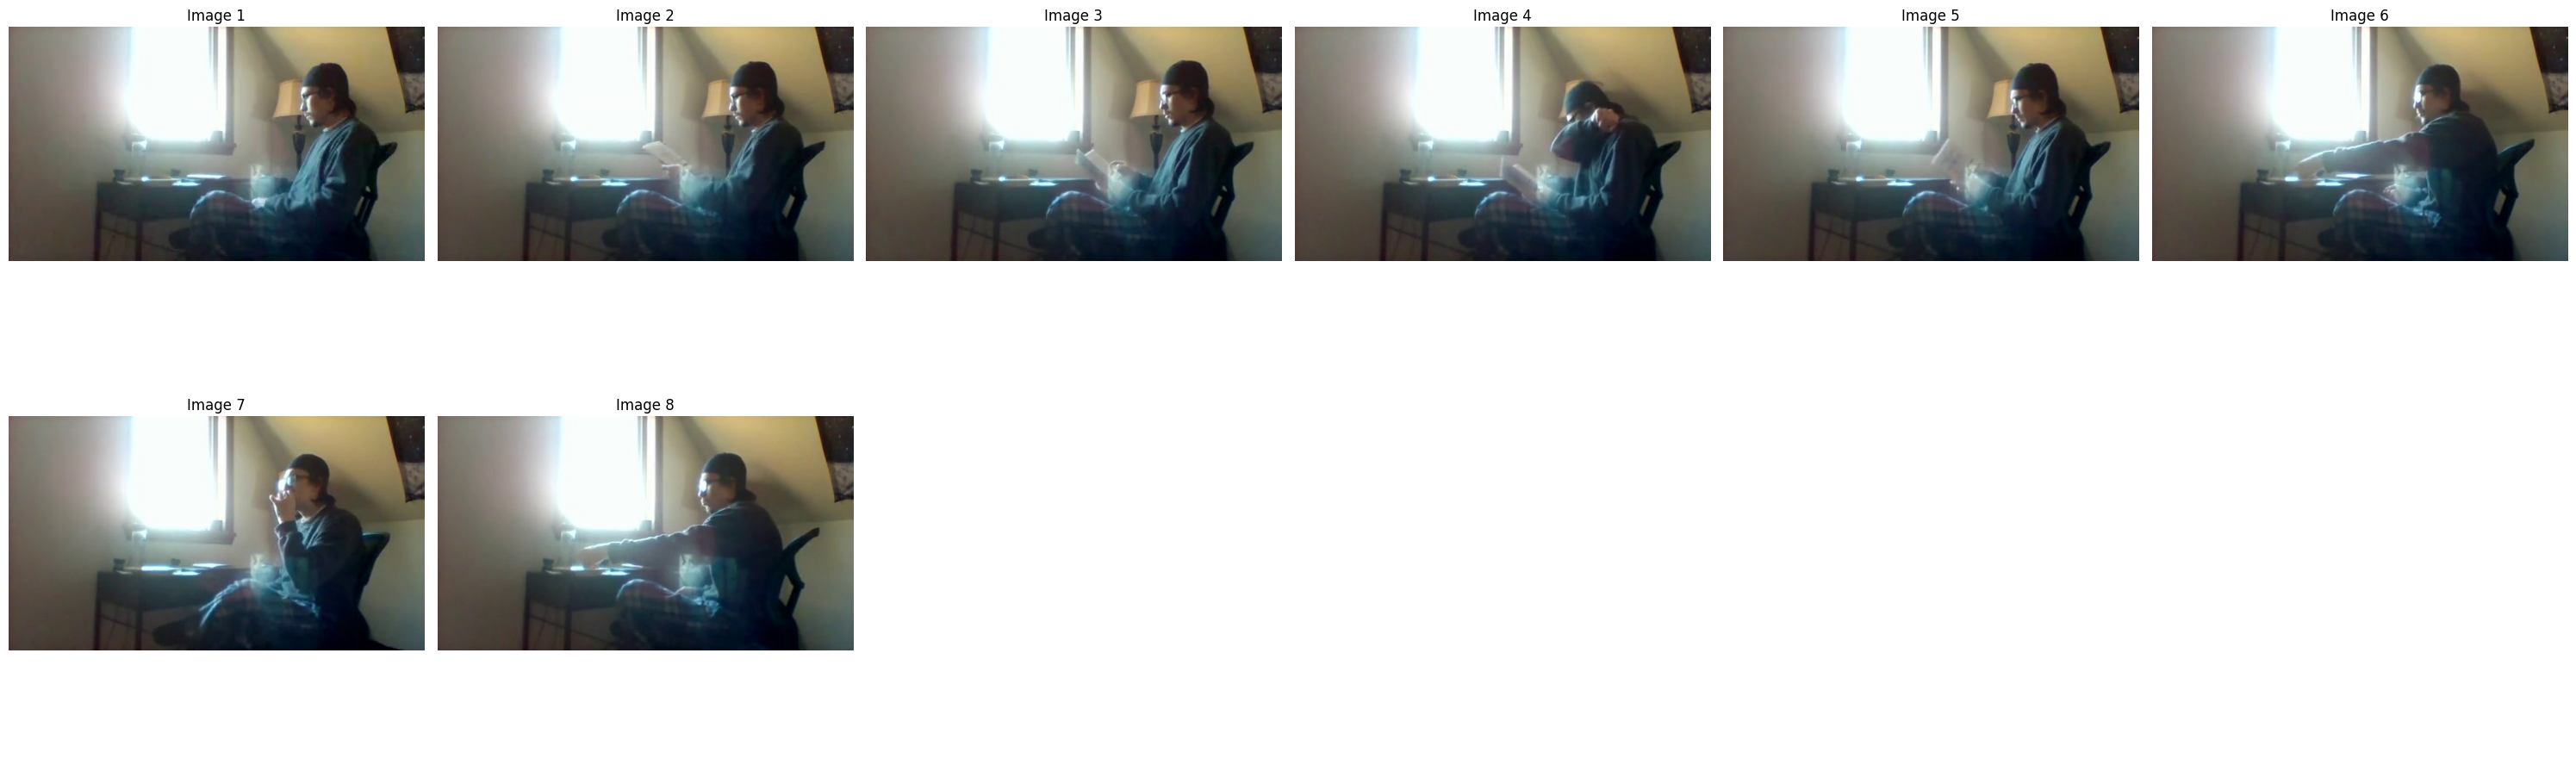

HUMAN:
<image><image><image><image><image><image><image><image>
Which object was eaten by the person?
A: The sandwich.
B: The medicine.
C: The blanket.
D: The box.


GPT:
A: The sandwich.

HUMAN:
Which object was closed by the person?
A: The book.
B: The refrigerator.
C: The closet/cabinet.
D: The window.


GPT:
A: The book.

HUMAN:
What did the person do with the paper/notebook?
A: Sat on.
B: Lied on.
C: Took.
D: Put down.


GPT:
C: Took.

HUMAN:
What did the person do with the paper/notebook?
A: Lied on.
B: Sat on.
C: Took.
D: Put down.


GPT:
D: Put down.

HUMAN:
What did the person do while they were holding the paper/notebook?
A: Tidied up the paper/notebook.
B: Lied on the paper/notebook.
C: Put down the paper/notebook.
D: Took the paper/notebook.


GPT:
C: Put down the paper/notebook.

HUMAN:
What did the person do while they were holding the food?
A: Threw the food.
B: Washed the food.
C: Put down the food.
D: Took the food.


GPT:
D: Took the food.

HUMAN:
What did the person 

In [86]:
# visualize the images
from PIL import Image
import os
import math

images = []
for img_path in dat["image"]:
    full_path = os.path.join("/data/weka/ellisb/datasets/video/m4_instruct", img_path)
    images.append(Image.open(full_path))

n_images = len(images)

cols = min(n_images, 6)
rows = math.ceil(n_images / cols)
fig, axs = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
# Ensure axs is a flat array for easier iteration
if rows * cols > 1:
    axs = axs.flatten()
else:
    axs = [axs]

for i, ax in enumerate(axs):
    if i < n_images:
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(f"Image {i + 1}")
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

for convo in dat["conversations"]:
    print(convo["from"].upper(), end=":\n")
    print(convo["value"])
    print()